# Writing a Video with CV2

In [1]:
# import the library
import os
import cv2
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import YouTubeVideo, display, HTML
from base64 import b64encode

%matplotlib inline

In [2]:
# Download Assets
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [3]:
URL = r"https://www.dropbox.com/s/p8h7ckeo2dn1jtz/opencv_bootcamp_assets_NB6.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"./data/opencv_bootcamp_assets_NB6.zip")

# Download if assest ZIP does not exists. 
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path) 

In [4]:
# Read Video from Source
source = './data/race_car.mp4'  # source = 0 for webcam

cap = cv2.VideoCapture(source)

In [5]:
if not cap.isOpened():
    print("Error opening video stream or file")

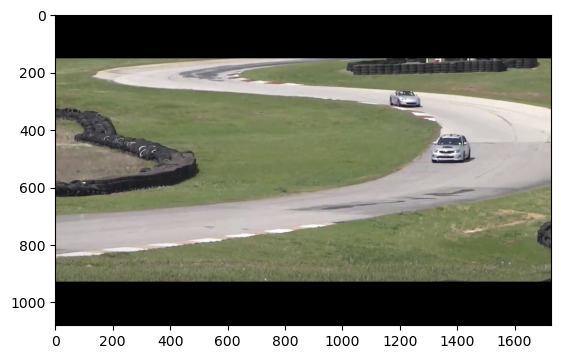

In [6]:
# Read and display one frame
ret, frame = cap.read()
plt.imshow(frame[..., ::-1])

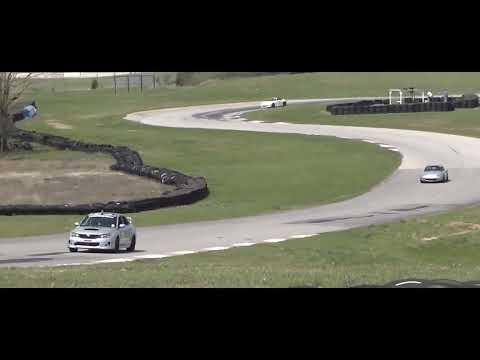

In [7]:
# Display the video file
video = YouTubeVideo("RwxVEjv78LQ", width=700, height=438)
display(video)

In [8]:
# Write Video using OpenCV
# Default resolutions of the frame are obtained.
# Convert the resolutions from float to integer.
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

# Define the codec and create VideoWriter object.
out_avi = cv2.VideoWriter("./data/race_car_out.avi", cv2.VideoWriter_fourcc("M", "J", "P", "G"), 10, (frame_width, frame_height))

out_mp4 = cv2.VideoWriter("./data/race_car_out.mp4", cv2.VideoWriter_fourcc(*"XVID"), 10, (frame_width, frame_height))

In [9]:
# Read frames and write to file
# Read until video is completed
while cap.isOpened():
    # Capture frame-by-frame
    ret, frame = cap.read()

    if ret:
        # Write the frame to the output files
        out_avi.write(frame)
        out_mp4.write(frame)

    # Break the loop
    else:
        break

In [10]:
# When everything done, release the VideoCapture and VideoWriter objects
cap.release()
out_avi.release()
out_mp4.release()

In [12]:
# Installing ffmpeg
!pip install imageio[ffmpeg]

   ---------------------------------------- 0.0/22.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/22.6 MB 660.6 kB/s eta 0:00:35
   ---------------------------------------- 0.3/22.6 MB 3.3 MB/s eta 0:00:07
   --- ------------------------------------ 1.8/22.6 MB 14.1 MB/s eta 0:00:02
   ---- ----------------------------------- 2.7/22.6 MB 15.5 MB/s eta 0:00:02
   ----- ---------------------------------- 3.0/22.6 MB 13.6 MB/s eta 0:00:02
   ------ --------------------------------- 3.5/22.6 MB 13.1 MB/s eta 0:00:02
   ------ --------------------------------- 3.8/22.6 MB 12.8 MB/s eta 0:00:02
   ------- -------------------------------- 4.3/22.6 MB 11.8 MB/s eta 0:00:02
   ------- -------------------------------- 4.3/22.6 MB 12.0 MB/s eta 0:00:02
   ------- -------------------------------- 4.3/22.6 MB 12.0 MB/s eta 0:00:02
   ------- -------------------------------- 4.3/22.6 MB 12.0 MB/s eta 0:00:02
   ------- -------------------------------- 4.3/22.6 MB 12.0 MB/s eta 0:

In [18]:
!conda install -c conda-forge ffmpeg -y

Retrieving notices: ...working... done
Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\ahmad\anaconda3

  added / updated specs:
    - ffmpeg


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libavif_api-1.0.4         |       h57928b3_5           9 KB  conda-forge
    aom-3.9.1                  |       he0c23c2_0         1.9 MB  conda-forge
    ca-certificates-2024.12.14 |       h56e8100_0         154 KB  conda-forge
    cairo-1.18.0               |       h1fef639_0         1.4 MB  conda-forge
    certifi-2024.12.14         |     pyhd8ed1ab_0         158 KB  conda-forge
    expat-2.6.4                |       he0c23c2_0         225 KB  conda-forge
    ffmpeg-7.0.1               | gpl_h7cec250_100         9.5 MB  conda-forge
    font-ttf-dejavu-sans-mono-2.37|       hab24e00_0         388 K

In [19]:
!ffmpeg -version

ffmpeg version 7.0.1 Copyright (c) 2000-2024 the FFmpeg developers
built with clang version 18.1.6
configuration: --prefix=/d/bld/ffmpeg_1716729588356/_h_env/Library --cc=clang.exe --cxx=clang++.exe --nm=llvm-nm --ar=llvm-ar --disable-doc --disable-openssl --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libharfbuzz --enable-libfontconfig --enable-libopenh264 --enable-libdav1d --ld=lld-link --target-os=win64 --enable-cross-compile --toolchain=msvc --host-cc=clang.exe --extra-libs=ucrt.lib --extra-libs=vcruntime.lib --extra-libs=oldnames.lib --strip=llvm-strip --disable-stripping --host-extralibs= --disable-libopenvino --enable-gpl --enable-libx264 --enable-libx265 --enable-libaom --enable-libsvtav1 --enable-libxml2 --enable-pic --enable-shared --disable-static --enable-version3 --enable-zlib --enable-libopus --pkg-config=/d/bld/ffmpeg_1716729588356/_build_env/Library/bin/pkg-config
libavutil      59.  8.100 / 59.  8.100
libavcodec     61.  3.100 / 61.  3.10

In [21]:
# Change video encoding of mp4 file from XVID to h264 
!ffmpeg -y -i "./data/race_car_out.mp4" -c:v libx264 "./data/race_car_out_x264.mp4"  -hide_banner -loglevel error

In [23]:
# Render MP4 Video

mp4 = open("./data/race_car_out_x264.mp4", "rb").read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML(f"""<video width=700 controls><source src="{data_url}" type="video/mp4"></video>""")

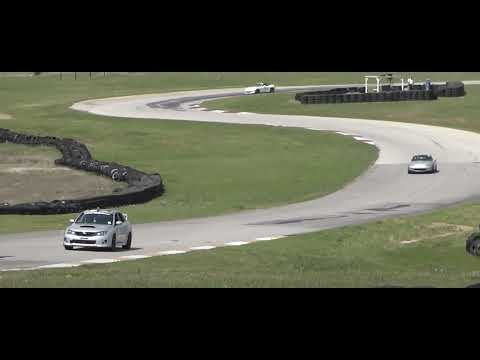

In [24]:
video = YouTubeVideo("2Gju7YLfkP0", width=700, height=438)
display(video)